#                              <span style="color:#002db3"> Analysis for No-show appointments data </span>
## <span style="color:#004d4d">Analysis points:</span>
* ## <span style="color:#4d1a00">  Did the hypertension and diabetes have an effect on missed the appointments?
* ## <span style="color:#4d1a00">  Is the scholarship has positive or negative effect in going to the  appointment?
* ## <span style="color:#4d1a00">  Women or men are more missed the appointment? why you think they do?
* ## <span style="color:#4d1a00">  Is sending smses is helpful in remind people to do not miss their appointment?talk more about that.

# Wrangling process
* ### Gathering data

In [1]:
# IMPORTING PACKAGES
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data
df=pd.read_csv('pr.csv')

* ### Assessing Data

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [9]:
def unique_val(col):
    uniq=list(df[col].unique())
    print(str(col)+ "'s unique values are "+str(uniq))
columns=["Gender","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received","No-show"]
for column in columns:
    unique_val(column)

Gender's unique values are ['F', 'M']
Scholarship's unique values are [0, 1]
Hipertension's unique values are [1, 0]
Diabetes's unique values are [0, 1]
Alcoholism's unique values are [0, 1]
Handcap's unique values are [0, 1, 2, 3, 4]
SMS_received's unique values are [0, 1]
No-show's unique values are ['No', 'Yes']


* ### Cleaning data

###### Data issue:
      1-minimum age equal -1 and maximun age equal 115.
      2-we have more than 3000 person didnot tell their age.

In [10]:
df.loc[df['Age'].isin([-1,115])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# replcae Age(-1) with the mean of All Ages.
# letting other value (115) as it may be normal to someone to reach to this age.
mean=int(df['Age'].mean())
df.loc[df.Age == -1, "Age"] = mean


In [12]:
# to make sure from everything we did.
df['Age'][df['Age']==-1].sum()

0

In [13]:
df[df['Age']==0].count()


PatientId         3539
AppointmentID     3539
Gender            3539
ScheduledDay      3539
AppointmentDay    3539
Age               3539
Neighbourhood     3539
Scholarship       3539
Hipertension      3539
Diabetes          3539
Alcoholism        3539
Handcap           3539
SMS_received      3539
No-show           3539
dtype: int64

# Exploring process

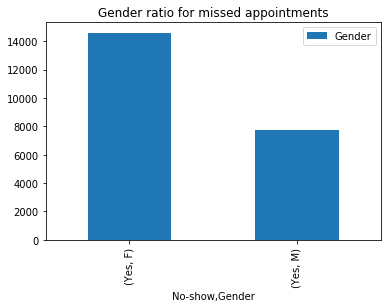

In [14]:
# relation betweeen no-show column and different columns.
df_n=df[df['No-show']== 'Yes']
nosh_g=pd.DataFrame(df_n.groupby(['No-show','Gender'])['Gender'].count())
nosh_g.plot(kind='bar',title='Gender ratio for missed appointments')
# from this bar chart females are more Missed appointments than men.

In [15]:
#df_n['Age'].describe()
nosh_N=pd.DataFrame(df_n.groupby(['No-show','Neighbourhood'])['Neighbourhood'].count().sort_values(ascending=False)).head(10)
nosh_N

Neighbourhood
No-show Neighbourhood                   
Yes     JARDIM CAMBURI              1465
        MARIA ORTIZ                 1219
        ITARARÉ                      923
        RESISTÊNCIA                  906
        CENTRO                       703
        JESUS DE NAZARETH            696
        JARDIM DA PENHA              631
        CARATOÍRA                    591
        TABUAZEIRO                   573
        BONFIM                       550

array([<matplotlib.axes._subplots.AxesSubplot object at 0x07D95A50>],
      dtype=object)

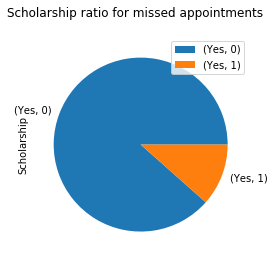

In [16]:
nosh_S=pd.DataFrame(df_n.groupby(['No-show','Scholarship'])['Scholarship'].count())
nosh_S.plot(kind='pie',subplots=True,title='Scholarship ratio for missed appointments')
# which mean people who didnot have scholarship are more missed appointments than who have with percent could reach to 87.5%.
# which is a huge percentage.

In [17]:
# let's compare between no-show and ['Hipertension ','Diabetes','Alcoholism','Handcap','SMS_received'] for both total
# data(df) and data for only missed appointments(df_n)

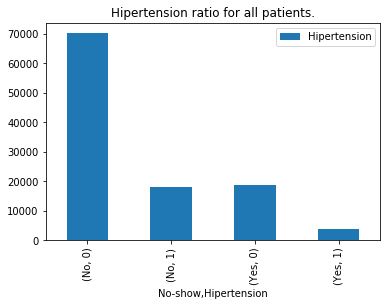

In [18]:
#ALL data
nosh_H=pd.DataFrame(df.groupby(['No-show','Hipertension'])['Hipertension'].count())
nosh_H.plot(kind='bar',title='Hipertension ratio for all patients.')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x07A2DB10>],
      dtype=object)

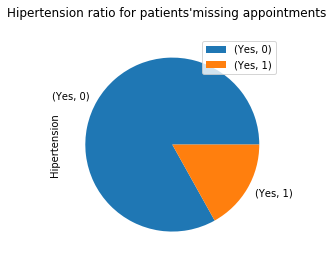

In [19]:
# missed appointments
nosh_H=pd.DataFrame(df_n.groupby(['No-show','Hipertension'])['Hipertension'].count())
nosh_H.plot(kind='pie',subplots=True,title='Hipertension ratio for patients\'missing appointments' )

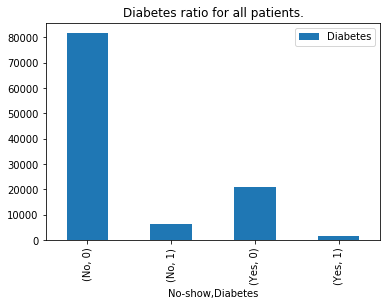

In [20]:
# ALL 
nosh_D=pd.DataFrame(df.groupby(['No-show','Diabetes'])['Diabetes'].count())
nosh_D.plot(kind='bar',title='Diabetes ratio for all patients.')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x07A9DFF0>],
      dtype=object)

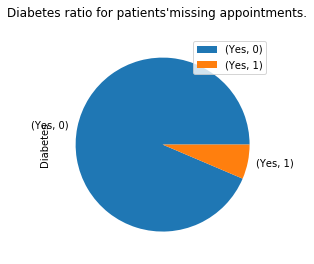

In [21]:
# missed appointments
nosh_D=pd.DataFrame(df_n.groupby(['No-show','Diabetes'])['Diabetes'].count())
nosh_D.plot(kind='pie',subplots=True,title='Diabetes ratio for patients\'missing appointments.')

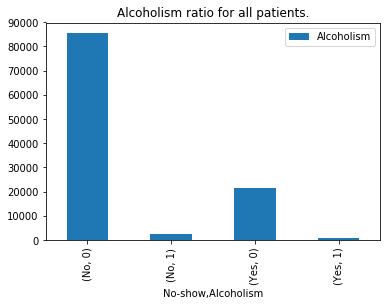

In [22]:
# ALL
nosh_A=pd.DataFrame(df.groupby(['No-show','Alcoholism'])['Alcoholism'].count())
nosh_A.plot(kind='bar',title='Alcoholism ratio for all patients.')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x07B1C770>],
      dtype=object)

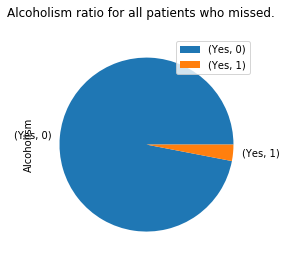

In [23]:
# misssed appointments
nosh_A=pd.DataFrame(df_n.groupby(['No-show','Alcoholism'])['Alcoholism'].count())
nosh_A.plot(kind='pie',subplots=True,title='Alcoholism ratio for all patients who missed.')

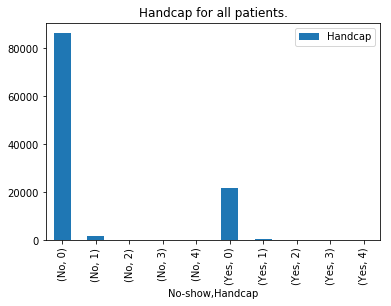

In [24]:
# ALL
nosh_HA=pd.DataFrame(df.groupby(['No-show','Handcap'])['Handcap'].count())
nosh_HA.plot(kind='bar',title='Handcap for all patients.')

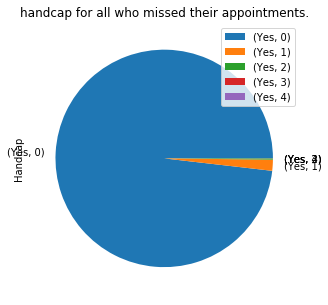

In [25]:
# missed appointments
nosh_HA=pd.DataFrame(df_n.groupby(['No-show','Handcap'])['Handcap'].count())
nosh_HA.plot.pie(y='Handcap', figsize=(5, 5),title='handcap for all who missed their appointments.')

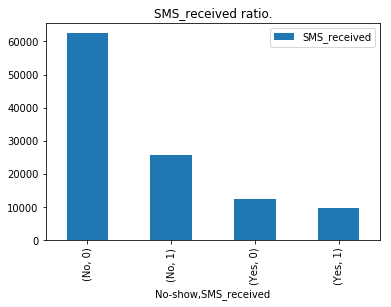

In [26]:
# ALL
nosh_SMS=pd.DataFrame(df.groupby(['No-show','SMS_received'])['SMS_received'].count())
nosh_SMS.plot(kind='bar',title='SMS_received ratio.')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x07D57A30>],
      dtype=object)

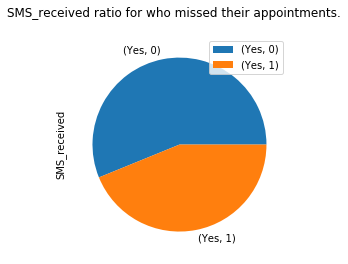

In [27]:
# missed appointments
nosh_SMS=pd.DataFrame(df_n.groupby(['No-show','SMS_received'])['SMS_received'].count())
nosh_SMS.plot(kind='pie',subplots=True,title='SMS_received ratio for who missed their appointments.')

#### The end of exploring process

<span style="color:Gray">**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>

# **Analysis time**

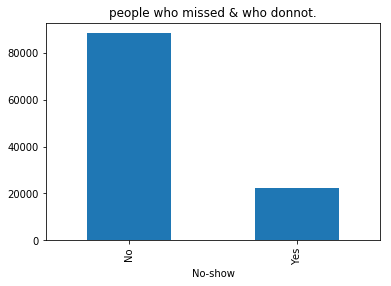

In [28]:
# this plot show us the ratio between the people who missed their apppointment and who donnot.
df.groupby('No-show')['No-show'].count().plot(kind='bar',title='people who missed & who donnot.')


#### 20% of peole who have an appointment are missed it

In [29]:
df.groupby('No-show')['No-show'].count()

No-show
No     88208
Yes    22319
Name: No-show, dtype: int64

## Question one:
* ### <span style="color:MediumSeaGreen"> Did the hypertension and diabetes have an effect on missed the appointments?
    

In [30]:
# did the hypertension and diabetes have an effect on missed the appointments?
# this plot aggregate hipertension numbers according to no-show in df_n (the data which contain only positive no show).
df_n.groupby(['Hipertension','No-show'])['No-show'].count()
# from that we see the hipertension is may be a factor in missing appointment

Hipertension  No-show
0             Yes        18547
1             Yes         3772
Name: No-show, dtype: int64

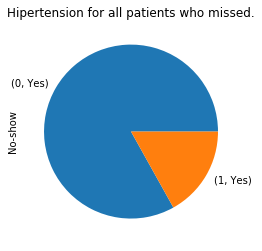

In [31]:
df_n.groupby(['Hipertension','No-show'])['No-show'].count().plot(kind="pie",title='Hipertension for all patients who missed.')


In [32]:
df.groupby(['Hipertension','No-show'])['No-show'].count()
# 20% of all patients have hipertension and the result below show us all the numbers .

Hipertension  No-show
0             No         70179
              Yes        18547
1             No         18029
              Yes         3772
Name: No-show, dtype: int64

#### <span style="color:DodgerBlue">19.7% of all patients have hipertension , *_17.3%_* of them missed the  appointment .</span>
#### <span style="color:DodgerBlue">from All the peole who missed the appointment 16.9% have hipertension.</span>

In [33]:
# Diabetes.
df_n.groupby(['Diabetes','No-show'])['No-show'].count()


Diabetes  No-show
0         Yes        20889
1         Yes         1430
Name: No-show, dtype: int64

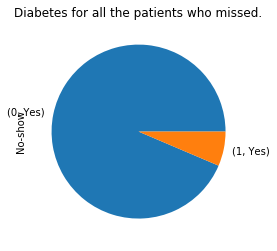

In [34]:
df_n.groupby(['Diabetes','No-show'])['No-show'].count().plot(kind="pie",title='Diabetes for all the patients who missed.')


In [35]:
df.groupby(['Diabetes','No-show'])['No-show'].count()

Diabetes  No-show
0         No         81695
          Yes        20889
1         No          6513
          Yes         1430
Name: No-show, dtype: int64

#### The comment:
##### <span style="color:DodgerBlue"> 7.2% of all patients have diabetes, 82% from them go the appointment and 18% of the missing appointment people  have diabetes.</span> 
##### <span style="color:DodgerBlue"> from All the peole who missed the appointment 6.4% have diabetes.</span>
##### <span style="color:DodgerBlue">  from All the peole who missed the appointment 16.9% have hipertension,so i can say it is a factor in misssing appointments rather than diabetes effect in missing appointments .</span>

## Question two:
### <span style="color:MediumSeaGreen"> Is the scholarship has positive or negative effect in going to the appointment?

In [36]:
#is the scholarship has positive or negative effect in going to the appointment?
df.groupby(['Scholarship','No-show'])['No-show'].count()

Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

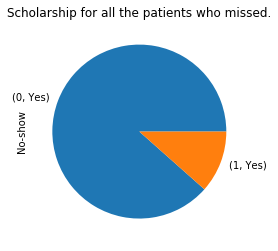

In [37]:
#the ratio of peole who missed their apointments and have scholarship.
df_n.groupby(['Scholarship','No-show'])['No-show'].count().plot(kind='pie',title='Scholarship for all the patients who missed.')

#### The comment:
#### <span style="color:DodgerBlue">only 9.8%  of all the people have scholarship which is really small number.</span>
#### <span style="color:DodgerBlue">from the people who have it 23% from them are missed the appointment .</span>
#### <span style="color:DodgerBlue">from the people who donnot have it 19.8% are missed the appointment.</span>
#### <span style="color:DodgerBlue">11.5% from the people who missed their appointment have Scholarship which mean *_it has no effect_*.</span>

## Question three:
### <span style="color:MediumSeaGreen"> Women or men are more missed the appointment?why you think they do?

In [38]:
#women or men are more missed the appointment?why you think they do?
df.groupby(['No-show','Gender'])['Gender'].count()

No-show  Gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64

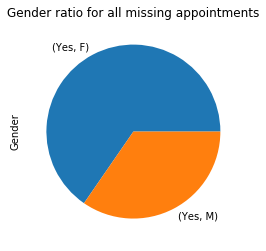

In [39]:
df_n.groupby(['No-show','Gender'])['Gender'].count().plot(kind='pie',title='Gender ratio for all missing appointments')

#### The comment:
#### <span style="color:DodgerBlue">76.2% from all the patients are women , 23.7% are men.</span>
#### <span style="color:DodgerBlue">65.3% from all the patients who missed the appointment are women , 34.6% are men.</span>
#### <span style="color:DodgerBlue">20% from women are missed the appointment.</span>
#### <span style="color:DodgerBlue">In my opinion women missed their appointments more than men due to their responsibilities(work-home-kids-etc). </span>

## Question four:
### <span style="color:MediumSeaGreen"> Is sending smses is helpful in remind people to do not miss their appointment?talk more about that.

In [40]:
#is sending smses is helpful in remind people to do not miss their appointment?talk more about that.
df.groupby(['No-show','SMS_received'])['SMS_received'].count()

No-show  SMS_received
No       0               62510
         1               25698
Yes      0               12535
         1                9784
Name: SMS_received, dtype: int64

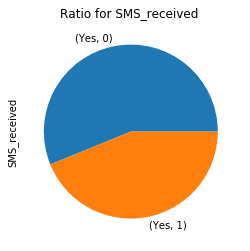

In [41]:
df_n.groupby(['No-show','SMS_received'])['SMS_received'].count().plot(kind='pie',title='Ratio for SMS_received ')

#### the comment:
#### <span style="color:DodgerBlue">32% from all the patients are received sms.27.6% from them missed their appointment.</span>
#### <span style="color:DodgerBlue">8.8% from all the patients who missed , are recived sms.</span>
#### <span style="color:DodgerBlue">It sure have positive effect even it may be little small from the ratios above but it still have good effect so the ratio for sending SMS should be increased.</span>

## Question five:
### <span style="color:MediumSeaGreen"> is there is a relation between sending smses and (scholarship-alcoholism-Hipertension-Diabetes)?

In [44]:
#31.5% from who have hipertension are recived sms which represent 19.3 % from total sending smss.
df.groupby(['SMS_received','Hipertension'])['Hipertension'].count()

SMS_received  Hipertension
0             0               60114
              1               14931
1             0               28612
              1                6870
Name: Hipertension, dtype: int64

In [45]:
#32.2% from who have Scholarship are recived sms which represent 9.9 % from total sending smss.
df.groupby(['SMS_received','Scholarship'])['Scholarship'].count()

SMS_received  Scholarship
0             0              67689
              1               7356
1             0              31977
              1               3505
Name: Scholarship, dtype: int64

In [46]:
#29.7% from who have Diabetes are recived sms which represent 6.6% from total sending smss.
df.groupby(['SMS_received','Diabetes'])['Diabetes'].count()

SMS_received  Diabetes
0             0           69458
              1            5587
1             0           33126
              1            2356
Name: Diabetes, dtype: int64

In [47]:
#25.2% from who have Alcoholism are recived sms which represent 2.5% from total sending smss.
df.groupby(['SMS_received','Alcoholism'])['Alcoholism'].count()

SMS_received  Alcoholism
0             0             72532
              1              2513
1             0             34635
              1               847
Name: Alcoholism, dtype: int64

### comment:
#### 38.3% from the total people which have specific condition either hipertension,diabetes,alcoholism or scholership ,have received sms.
#### that lead us that 61.7% have recived sms and didnot suffer from specific condition.
#### that also lead us again that sending messages are randomly.

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Conclusions:

* ### <span style="color:Tomato"> females are more Missed appointments than men.</span>
* ### <span style="color:Tomato">the top three Neighbourhood which have more missed appointments are (JARDIM CAMBURI,MARIA ORTIZ,ITARARÉ)</span>
* ### <span style="color:Tomato">people who didnot have scholarship are more missed appointments than who have with percent could reach to**87.5%**, which is  a huge percentage.</span>
* ### <span style="color:Tomato"> very few people who have Hipertension are missed appointments. </span>
* ### <span style="color:Tomato"> very few people who have Diabetes are missed appointments thier ratio is really small.</span> 
* ### <span style="color:Tomato"> people who are Alcoholism who are missed appointments thier ratio is really small could reach to **1%**.</span>
* ### <span style="color:Tomato"> people who has Handicap who are missed appointments thier ratio is really small to a degree could tell us there is effect.</span>
* ### <span style="color:Tomato">peaple who received sms *_are less than the half number of all people _*, </span>
   ### <span style="color:Tomato">    people who received sms [nearly**27%** from them missed the appointment] </span>
   ### <span style="color:Tomato"> people who didnot receive sms [nearly**17%** from them missed the appointment]   </span>
* ### <span style="color:Tomato">sending messages are randomly. </span>
   
   
### limitations:
 #### <span style="color:Tomato"> During dealing with data the diffiultes which i faced are:
    * (No-show column and it's values no or yes which sometime makes me confused about it.),
    * (handicap column has more than 2 values to express patient's health case but i don't really understand the base to determine the handicap number for patients.),
    * (3000 patient didnot provide their ages.)</span>
    
### Suggestions:
* hipertension-diabetes-alcoholism columns their values should be yes or no instead of 0 an 1.
* no-show column should change it's name to show column and it's values yes for people who went to their appointments and no for who missed it.
* handicap column its values will be easily understandable and easy in analysis if it's values is yes or no.


 <span style="color:black"> **---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**</span>